# HI , this kernel shows machine learning basics for the very first beginners 
 We'll start with a model called the Decision Tree. There are fancier models that give more accurate predictions. But decision trees are easy to understand, and they are the basic building block for some of the best models in data science.

For simplicity, we'll start with the simplest possible decision tree. 

![First Decision Trees](http://i.imgur.com/7tsb5b1.png)

It divides houses into only two categories. The predicted price for any house under consideration is the historical average price of houses in the same category.

We use data to decide how to break the houses into two groups,  and then again to determine the predicted price in each group.  This step of capturing patterns from data is called **fitting** or **training** the model. The data used to **fit** the model is called the **training data**.  

The details of how the model is fit (e.g. how to split up the data) is complex enough that we will save it for later. After the model has been fit, you can apply it to new data to **predict** prices of additional homes.

# In our Case we won't talk about houses but about VIDEO GAMES HAHAH
**Don't expect a lot of EDAs ,as the titles says its an intro to machine learning decisions tree model **

In [1]:
import pandas as pd # for data preprocessing in the workspace
import numpy as np #calculus and linear algebra
# plotters
import matplotlib.pyplot as plt 
import seaborn as sns

import chart_studio.plotly as py  # plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
Data = pd.read_csv("input/vgsales.csv")
Data.head(20)# first 20 records 

Rank                                          Name Platform    Year  \
0      1                                    Wii Sports      Wii  2006.0   
1      2                             Super Mario Bros.      NES  1985.0   
2      3                                Mario Kart Wii      Wii  2008.0   
3      4                             Wii Sports Resort      Wii  2009.0   
4      5                      Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                        Tetris       GB  1989.0   
6      7                         New Super Mario Bros.       DS  2006.0   
7      8                                      Wii Play      Wii  2006.0   
8      9                     New Super Mario Bros. Wii      Wii  2009.0   
9     10                                     Duck Hunt      NES  1984.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
12    13                   Pokemon Gold/Pokemon Silver       GB  1999.0   
13    14                                       Wii Fit      Wii  2007.0   
14    15                                  Wii Fit Plus      Wii  2009.0   
15    16                            Kinect Adventures!     X360  2010.0   
16    17                            Grand Theft Auto V      PS3  2013.0   
17    18                 Grand Theft Auto: San Andreas      PS2  2004.0   
18    19                             Super Mario World     SNES  1990.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   

           Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                Nintendo     41.49     29.02      3.77   
1       Platform                Nintendo     29.08      3.58      6.81   
2         Racing                Nintendo     15.85     12.88      3.79   
3         Sports                Nintendo     15.75     11.01      3.28   
4   Role-Playing                Nintendo     11.27      8.89     10.22   
5         Puzzle                Nintendo     23.20      2.26      4.22   
6       Platform                Nintendo     11.38      9.23      6.50   
7           Misc                Nintendo     14.03      9.20      2.93   
8       Platform                Nintendo     14.59      7.06      4.70   
9        Shooter                Nintendo     26.93      0.63      0.28   
10    Simulation                Nintendo      9.07     11.00      1.93   
11        Racing                Nintendo      9.81      7.57      4.13   
12  Role-Playing                Nintendo      9.00      6.18      7.20   
13        Sports                Nintendo      8.94      8.03      3.60   
14        Sports                Nintendo      9.09      8.59      2.53   
15          Misc  Microsoft Game Studios     14.97      4.94      0.24   
16        Action    Take-Two Interactive      7.01      9.27      0.97   
17        Action    Take-Two Interactive      9.43      0.40      0.41   
18      Platform                Nintendo     12.78      3.75      3.54   
19          Misc                Nintendo      4.75      9.26      4.16   

    Other_Sales  Global_Sales  
0          8.46         82.74  
1          0.77         40.24  
2          3.31         35.82  
3          2.96         33.00  
4          1.00         31.37  
5          0.58         30.26  
6          2.90         30.01  
7          2.85         29.02  
8          2.26         28.62  
9          0.47         28.31  
10         2.75         24.76  
11         1.92         23.42  
12         0.71         23.10  
13         2.15         22.72  
14         1.79         22.00  
15         1.67         21.82  
16         4.14         21.40  
17        10.57         20.81  
18         0.55         20.61  
19         2.05         20.22

In [3]:
Data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Let's have a look on the game platform which contains the most games.

Text(0.5, 1.0, 'Grouped Platforms count')

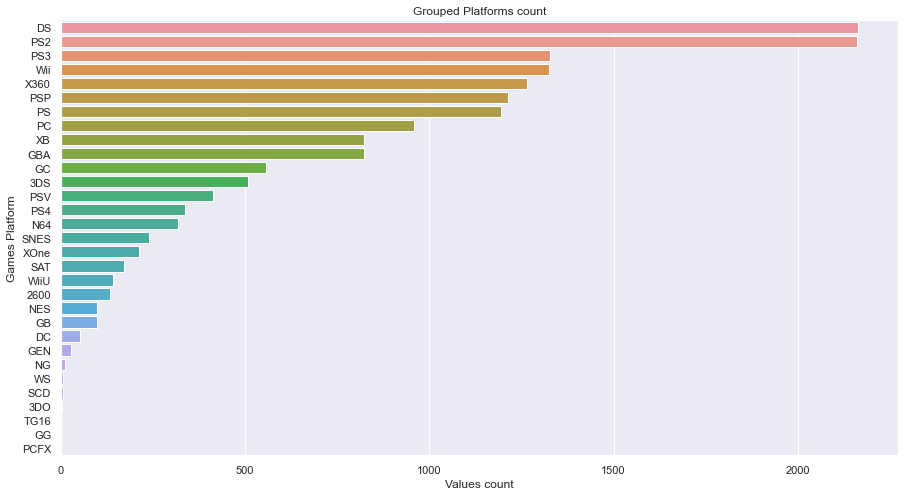

In [4]:
plt.figure(figsize=(15,8))
sns.set()
plt.grid(True)
sort_plat = Data['Platform'].value_counts().sort_values(ascending=False)
sort_plat.head()
sns.barplot(y=sort_plat.index,x=sort_plat.values,orient='h')
plt.xlabel('Values count')
plt.ylabel('Games Platform')
plt.title('Grouped Platforms count')

## World rank of the top 100 video games, north america sales and europe sales.

In [5]:

df_gl=Data.loc[:99,:] # data.iloc[:100,:] -- data.head(100)

import plotly.graph_objs as go

trace1=go.Scatter(
                x=df_gl.Rank,
                y=df_gl.NA_Sales,
                mode="lines+markers",
                name="North America Sales",
                text=df_gl.Name)
trace2=go.Scatter(
                x=df_gl.Rank,
                y=df_gl.EU_Sales,
                mode="lines",
                name="Europe Sales",
                text=df_gl.Name)

edit_df=[trace1,trace2]
layout=dict(title="World rank of the top 100 video games, EU Sales and NA Sales .",
            xaxis=dict(title="World Rank",tickwidth=5,ticklen=8,zeroline=False))
fig=dict(data=edit_df,layout=layout)
iplot(fig)

In [6]:
Data.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

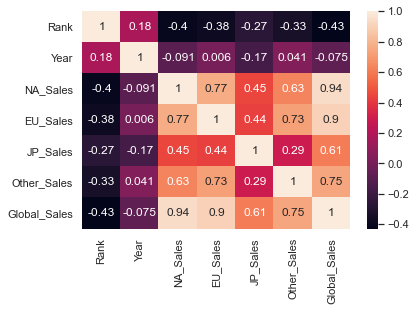

In [7]:

sns.heatmap(Data.corr(),cbar=True,annot=True)

As we can clearly see , NA_Sales is the highest correlation but we cant deny EU_Sales and the Other_Sales that are stongly correlated too.

In [8]:
max_Sales = Data[Data['Global_Sales']==max(Data['Global_Sales'])]
max_Sales

Rank        Name Platform    Year   Genre Publisher  NA_Sales  EU_Sales  \
0     1  Wii Sports      Wii  2006.0  Sports  Nintendo     41.49     29.02   

   JP_Sales  Other_Sales  Global_Sales  
0      3.77         8.46         82.74

# SIMPLE EDA to show the correlation and explains the model choosen

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Global Sales - NA Sales ')

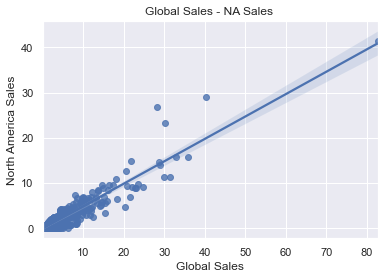

In [9]:
sns.set()
sns.regplot(Data['Global_Sales'],Data['NA_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('North America Sales')
plt.title('Global Sales - NA Sales ')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Global Sales - EU Sales ')

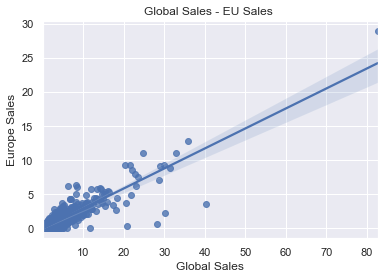

In [10]:
sns.regplot(Data['Global_Sales'],Data['EU_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Europe Sales')
plt.title('Global Sales - EU Sales ')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Global Sales - JP Sales ')

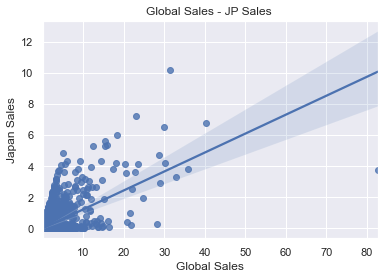

In [11]:
sns.regplot(Data['Global_Sales'],Data['JP_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Japan Sales')
plt.title('Global Sales - JP Sales ')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Global Sales - Others Sales ')

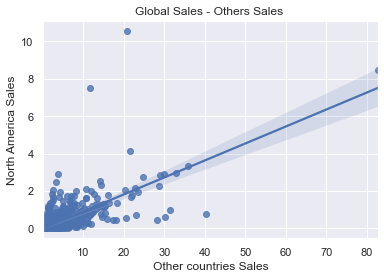

In [12]:
sns.regplot(Data['Global_Sales'],Data['Other_Sales'])
plt.xlabel('Other countries Sales')
plt.ylabel('North America Sales')
plt.title('Global Sales - Others Sales ')

(16598, 11)


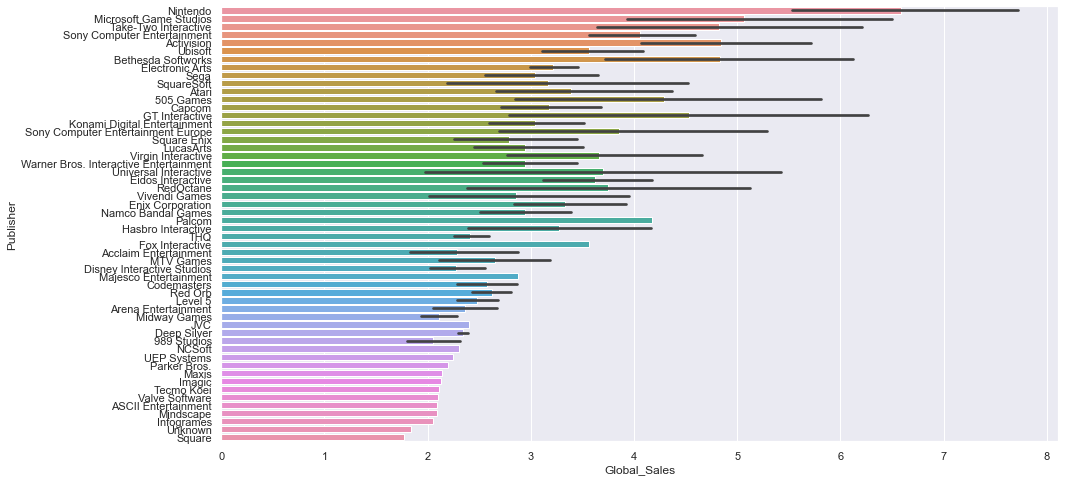

In [13]:
plt.figure(figsize=(15,8))
cop = Data.copy()
cop.sort_values('Global_Sales',ascending=False)
print(cop.shape)
cop1 = cop.head(1000).copy()
sns.barplot(y=cop1['Publisher'],x=cop1['Global_Sales'],orient='h')


In [14]:
#Some label encoding since we have some categorical DATA
obj_cols = [col for col in cop.columns if cop[col].dtype=='object']
print('Columns that will be encoded are ='+str(obj_cols))

Columns that will be encoded are =['Name', 'Platform', 'Genre', 'Publisher']


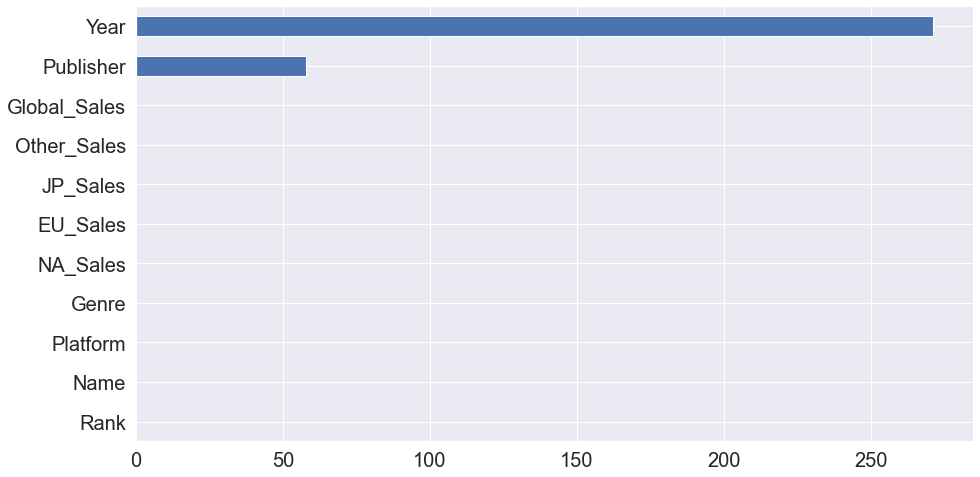

In [15]:
#Quick peak into NA columns

fig = plt.figure(figsize=(15, 8))
cop.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20)


In [16]:
cop.drop('Year',axis=1)

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16598 rows x 10 columns]

In [17]:
print(cop.shape)

(16598, 11)


In [18]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: cop[col].nunique(), obj_cols))
d = dict(zip(obj_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Genre', 12), ('Platform', 31), ('Publisher', 578), ('Name', 11493)]

**Since we have 4 categorical data with far more than 10 entries , wont be good to OH( One hot encoding) them , label coding will be fair enough but will overfit the model , we will just skip the label encoding **

In [19]:
from sklearn.model_selection import train_test_split #Best approach to test the model
from sklearn.metrics import mean_absolute_error # mean absolute error , error = predictions - validation_y then abs for pos value
from sklearn.tree import DecisionTreeRegressor #model
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']#our features
X = cop[features]
y = cop.Global_Sales #target
train_X , val_X , train_y , val_y = train_test_split(X,y,test_size=0.25,random_state=1)
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X,train_y)

DecisionTreeRegressor(random_state=1)

In [20]:
predictions =model.predict(val_X)
mae = mean_absolute_error(predictions, val_y)
print('Mean absolute error '+str(mae))

Mean absolute error 0.05468966377840148


In [21]:

df = pd.DataFrame({'Actual': val_y, 'Predicted': predictions})
df


Actual  Predicted
4234     0.46   0.460000
7119     0.23   0.231250
106      7.13   7.600000
5242     0.36   0.360000
13547    0.04   0.041458
...       ...        ...
13566    0.04   0.044000
11302    0.08   0.090000
1038     1.72   1.670000
9748     0.12   0.118772
6901     0.24   0.235000

[4150 rows x 2 columns]

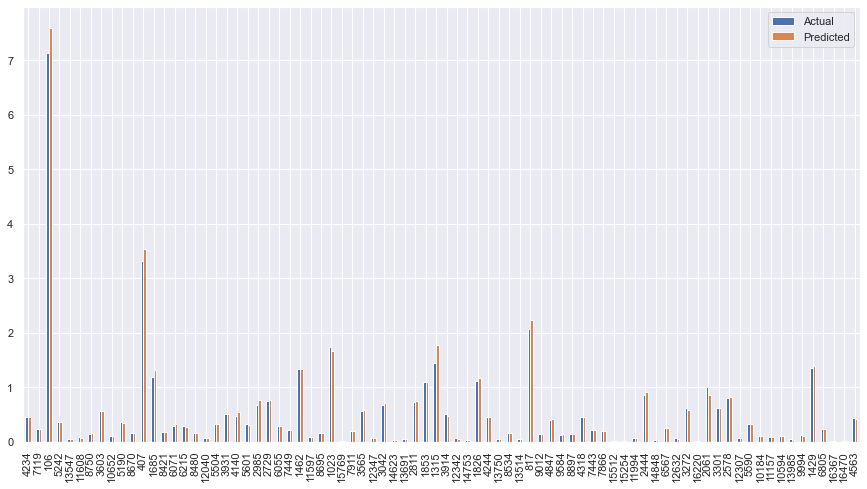

In [22]:

df1 = df.head(80)
df1.plot(kind='bar',figsize=(15,8))
plt.show()

In [26]:
val_X['Global_Sales']=predictions
print(len(df.index))
val_X['Rank'] = df.index
val_X[['Rank','Global_Sales']].to_csv('sub_for_nothing.csv',index=False)
df.to_csv('predvsval_y.csv',index=False)

4150


<ipython-input-26-22ca0feb206e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-22ca0feb206e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### We reached together the end of this Kernel , if you found it useful an upvote would be very appreciated , thanks see you in the next kernel !